In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
def handle(e):
    print("Exception raised in " + e)

In [34]:
def read_csv(path):
    try:
        if('csv' == path.split(".")[-1]):
            data = pd.read_csv(path)
        else:
            print("The files is not a CSV file")
    except Exception as e:
        handle('file reading')
    return data

In [35]:
data = read_csv('data/fake_job_test.csv')

In [36]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,14566,Android Developer - Official London Travel App,"GB, LND, London",Software Development,NaN,What Now?! is an innovative new app that simul...,ABOUT What Now?! is an innovative new app that...,MINIMUM QUALIFICATIONS Commercial user interfa...,Job type: Full-timeCompensation: Generous and ...,0,1,1,Full-time,Not Applicable,Unspecified,"Leisure, Travel & Tourism",Engineering,0
1,7681,Customer Care Specialist,"US, NY, New York",Provisions by Food52,NaN,"We're Food52, and we've created a groundbreaki...",Do you gush over brand loyalty and great custo...,· 2-3 years experience in a customer-facing ...,NaN,0,1,0,Full-time,NaN,NaN,NaN,NaN,0
2,8115,Customer Success Manager,"SG, 01,",Success,20000-50000,If working in a cubical seems like your idea o...,Recognized as one of the region’s hottest star...,"What are we looking for: You are a happy, posi...",What's in it for you?Work at our cool office ...,0,1,0,Full-time,Associate,High School or equivalent,Computer Software,Customer Service,0
3,1551,"Managing Director, Analytics","US, NY, New York",NaN,NaN,"Since 2001, RL Zapin Associates has been a rec...",Great Opportunity to make an impact and grow s...,You have:Technical Experience:10+ years of exp...,NaN,0,1,1,Full-time,Director,Master's Degree,Marketing and Advertising,Business Analyst,0
4,4264,"Webmaster, Thai Service","US, DC, Washington",NaN,NaN,Applied Memetics LLC is a professional service...,The Webmaster shall properly complete all dail...,The Webmaster shall have at least three years ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


Droping unnecessary Columns

In [37]:
columns = ['telecommuting','has_company_logo','has_questions','salary_range','employment_type']
# columns = ['company_profile', 'requirements','benefits', 'telecommuting','has_company_logo', 'has_questions',
#                           'required_experience', 'required_education','industry', 'function']

# data = data.drop(columns=['company_profile', 'requirements','benefits', 'telecommuting','has_company_logo', 'has_questions',
#                           'required_experience', 'required_education','industry', 'function'])
for col in columns:
    del data[col]
# print(data.columns.values)
# print(len(data.columns.values))
data.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,14566,Android Developer - Official London Travel App,"GB, LND, London",Software Development,What Now?! is an innovative new app that simul...,ABOUT What Now?! is an innovative new app that...,MINIMUM QUALIFICATIONS Commercial user interfa...,Job type: Full-timeCompensation: Generous and ...,Not Applicable,Unspecified,"Leisure, Travel & Tourism",Engineering,0
1,7681,Customer Care Specialist,"US, NY, New York",Provisions by Food52,"We're Food52, and we've created a groundbreaki...",Do you gush over brand loyalty and great custo...,· 2-3 years experience in a customer-facing ...,NaN,NaN,NaN,NaN,NaN,0
2,8115,Customer Success Manager,"SG, 01,",Success,If working in a cubical seems like your idea o...,Recognized as one of the region’s hottest star...,"What are we looking for: You are a happy, posi...",What's in it for you?Work at our cool office ...,Associate,High School or equivalent,Computer Software,Customer Service,0
3,1551,"Managing Director, Analytics","US, NY, New York",NaN,"Since 2001, RL Zapin Associates has been a rec...",Great Opportunity to make an impact and grow s...,You have:Technical Experience:10+ years of exp...,NaN,Director,Master's Degree,Marketing and Advertising,Business Analyst,0
4,4264,"Webmaster, Thai Service","US, DC, Washington",NaN,Applied Memetics LLC is a professional service...,The Webmaster shall properly complete all dail...,The Webmaster shall have at least three years ...,NaN,NaN,NaN,NaN,NaN,0


In [38]:
def missing_values(data):
    print('Handling Missing Data')
    # print(data)
    # data =  data.iloc[[0]]
    # print(data)
    # print(data.to_numpy())
    try:
        # data['location'].fillna('no info', inplace = True)
        data['location'] = data['location'].fillna('no info')
        withoutcomma = data[~data['location'].str.contains(",", na=False)].index
        withcomma = data[data['location'].str.contains(",", na=False)].index
        data.loc[withcomma, 'country'] = data.loc[withcomma, 'location'].str.split(',').str[0].str.strip()
        data.loc[withoutcomma, 'country'] = data.loc[withoutcomma, 'location'].str.strip()
        """2.salary range"""

        # data['salary_range'].fillna('0-0', inplace = True)
        # data['salary_range'] = data['salary_range'].fillna('no info')

        # data.loc[data['salary_range'].str.contains(r'[a-zA-Z]', na=False), 'salary_range'] = '0-0'

        # # Extract minimum and maximum salary using regex
        # salary_split = data['salary_range'].str.extract(r'(\d+)-(\d+)')

        # # Assign extracted values
        # data['minimum_salary'] = salary_split[0].fillna(data['salary_range'])
        # data['maximum_salary'] = salary_split[1].fillna(data['salary_range'])


        """3. All other categorical columns and remaining numeric columns."""

        columns = data.columns
        for i in columns:
            if(data[i].isna().any()):
                if(data[i].dtypes == 'object'):
                    # data[i].fillna('no info', inplace = True)
                    data[i] = data[i].fillna('no info')
                    data[i] = data[i].str.lower()

                else:
                    # data[i].fillna(0, inplace = True)
                    data[i] = data[i].fillna(0)


        data.drop(['location'], axis = 1, inplace = True)
        # data.drop(['salary_range', 'location'], axis = 1, inplace = True)
        # print(data)
        return data
    except Exception as e:
        print('exceptions  ')
        print(e)
        handle('missing data handling process')


In [39]:
import re
import string
import math
import pandas as pd
from nltk.cluster import cosine_distance
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import wordnet
import category_encoders as ce
import pickle

In [40]:
def removeuncessary(text):
    try:
        '''
        1. removing punctuations,
        2. removing numbered words,
        3. removing unknown characters

        '''
        text = re.sub('[%s]'%re.escape(string.punctuation), '', str(text))
        text = re.sub('\w*\d\w*', '', str(text))
        text = re.sub('[^a-zA-Z ]+', ' ', str(text))

        return text
    except Exception as e:
        handle('removing unnecessary text')

<>:10: SyntaxWarning: invalid escape sequence '\w'
<>:10: SyntaxWarning: invalid escape sequence '\w'
C:\Users\akhil\AppData\Local\Temp\ipykernel_14900\1810665403.py:10: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', str(text))


In [41]:
def stopwordsremove(text):
    stop_words = set(stopwords.words('english'))
    try:
        word_token = word_tokenize(text)
        ps = PorterStemmer()
        filtered = [ps.stem(w.lower())
                    for w in word_token if not w in stop_words]
        return filtered
    except Exception as e:
        # print('error in stopword removal')
        # print(e)
        handle('stop words removing')

In [42]:
def synonym_relation(text1, text2):
    try:
        if(text1 == 'no info' or text2 == 'no info'):
            return 0
        else:
            text1 = stopwordsremove(text1)
            text2 = stopwordsremove(text2)
            syn_set = set()
            count  = 0
            if(len(text1) == 0 or len(text2) == 0):
                return 0
            if(len(text1) < len(text2)):
                for word in text2:
                    for syn in wordnet.synsets(word):
                        for l in syn.lemmas():
                            syn_set.add(l.name())

                for word in text1:
                    if word in syn_set:
                            count += 1
                return (count / len(text1))
            else:
                for word in text1:
                    for syn in wordnet.synsets(word):
                        for l in syn.lemmas():
                            syn_set.add(l.name())

                for word in text2:
                    if word in syn_set:
                            count += 1
                return (count / len(text2))
    except Exception as e:
        # print(e)
        handle('synonym relation finding process')

In [43]:
def categorical_cols_test(data):
    print('Categorical Encoding')
    try:
        encoder = pickle.load( open( "model/encoder.p", "rb" ) )
        newdata = encoder.transform(data)
        return newdata
    except Exception as e:
        print(e)
        handle('categorical columns handling for testing process')

In [ ]:
def texthandling(data):
        print('Text Handling')
        # print(data)
        print(data.columns.values)
        # print(set(stopwords.words('english')))
        # return
        try:
            '''
            This function is for handling text data columns company profile,
            description, requirements, benefits are there is multiple text in
            those columns we need to do something about them.
            '''
            stop_words = set(stopwords.words('english'))
            for i in range(0, data.shape[0]):
                print('text Handling : ', i)
                data.loc[i, 'company_profile'] = removeuncessary(data.loc[i,
                                                            'company_profile'])
                data.loc[i, 'description'] = removeuncessary(data.loc[i,
                                                                'description'])
                data.loc[i, 'requirements'] = removeuncessary(data.loc[i,
                                                               'requirements'])
                data.loc[i, 'benefits'] = removeuncessary(data.loc[i,
                                                                   'benefits'])
                data.loc[i, 'title'] = removeuncessary(data.loc[i, 'title'])
                data.loc[i, 'department'] = removeuncessary(data.loc[i,
                                                                 'department'])
                data.loc[i, 'industry'] = removeuncessary(data.loc[i,
                                                                   'industry'])
                data.loc[i, 'function'] = removeuncessary(data.loc[i,
                                                                   'function'])

                words = str(data.loc[i, 'company_profile'])
                if(words == 'no info'):
                    data.loc[i, 'company_profile_word_count'] = 0
                else:
                    data.loc[i, 'company_profile_word_count'] = len(
                                                                 words.split())

                words = str(data.loc[i, 'benefits'])
                if(words == 'no info'):
                    data.loc[i, 'benefits_word_count'] = 0
                else:
                    data.loc[i, 'benefits_word_count'] = len(words.split())

                data.loc[i, 'title_and_job_similarity'] = synonym_relation(
                                data.loc[i, 'title'], data.loc[i,
                                                                'description'])

                data.loc[i, 'title_and_req_similarity'] = synonym_relation(
                                data.loc[i, 'title'], data.loc[i,
                                                               'requirements'])

                data.loc[i, 'profile_and_job_similarity'] = synonym_relation(
                       data.loc[i, 'company_profile'], data.loc[i,
                                                                'description'])

                data.loc[i, 'profiel_and_req_similarity'] = synonym_relation(
                      data.loc[i, 'company_profile'], data.loc[i,
                                                               'requirements'])

                data.loc[i,
                'title_and_department_syn_similarity'] = synonym_relation(
                               data.loc[i, 'title'], data.loc[i, 'department'])

                data.loc[i,
                'title_and_industry_syn_similarity'] = synonym_relation(
                                  data.loc[i, 'title'],data.loc[i, 'industry'])

                data.loc[i,
                'title_and_function_syn_similarity'] = synonym_relation(
                                 data.loc[i, 'title'], data.loc[i, 'function'])

                data.loc[i,
                'industry_and_department_syn_similarity'] = synonym_relation(
                            data.loc[i, 'industry'], data.loc[i, 'department'])

                data.loc[i,
                'function_and_department_syn_similarity'] = synonym_relation(
                            data.loc[i, 'function'], data.loc[i, 'department'])
                data.loc[i,
                'industry_and_function_syn_similarity'] =synonym_relation(
                              data.loc[i, 'industry'], data.loc[i, 'function'])

            for i in ['title_and_job_similarity', 'title_and_req_similarity',
                    'profile_and_job_similarity', 'profiel_and_req_similarity',
                    'title_and_department_syn_similarity',
                    'title_and_industry_syn_similarity',
                    'title_and_function_syn_similarity',
                    'function_and_department_syn_similarity',
                    'industry_and_department_syn_similarity',
                    'industry_and_function_syn_similarity']:

                    # data[i].fillna(0, inplace = True)
                    data[i] = data[i].fillna(0)


            data.drop(['company_profile', 'benefits', 'description',
                       'requirements', 'title', 'department', 'industry',
                       'function',], axis = 1, inplace = True)
            return data
        except Exception as e:
            print(e)
            handle('Text handling process')

In [45]:
import pickle
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [ ]:
def score_and_save(y_pred):
    try:
        data = read_csv('data/fake_job_test.csv')
        columns = ['telecommuting','has_company_logo','has_questions','salary_range','employment_type']
        # columns = ['company_profile', 'requirements','benefits', 'telecommuting','has_company_logo', 'has_questions',
        #                           'required_experience', 'required_education','industry', 'function']

        # data = data.drop(columns=['company_profile', 'requirements','benefits', 'telecommuting','has_company_logo', 'has_questions',
        #                           'required_experience', 'required_education','industry', 'function'])
        for col in columns:
            del data[col]
            
        y_test = data['fraudulent']
        cm = confusion_matrix(y_test, y_pred)
        print("\n"+"SCORES")
        # print("confusion matrix")
        # print(cm)
        print(classification_report(y_test,y_pred))
        print('F1-Score'+' = '+str(round(f1_score(y_test, y_pred),4)))
        print('Precision'+' = '+str(round(precision_score(y_test, y_pred),4)))
        print('Recall'+' = '+str(round(recall_score(y_test, y_pred),4)))
        print('Accuracy'+' = '+str(round(accuracy_score(y_test,y_pred),4)))

        data['fraud_prediction'] = y_pred
        return cm
        # data.to_csv('predictionoutput/testsetprediction.csv')
    except Exception as e:
        print(e)
        handle('scoring and saving process')


In [47]:
def load_model_predict(data):
    try:
        X_test = data.drop('fraudulent',axis = 1)
        y_test = data['fraudulent']
        # print("X_test")
        # print(X_test)
        scaler = pickle.load( open( "model/scaler.p", "rb" ) )
        X_test = scaler.transform(X_test)
        # print("X_test 2")
        # print(X_test)
        filename = 'model/finalized_model.p'
        model = pickle.load(open(filename, 'rb'))

        y_pred = model.predict(X_test)
        # print("y_pred")
        # print(y_pred)
        return score_and_save(y_pred)
    except Exception as e:
        print(e)
        handle('prediction process')



### Calling the function

In [48]:
fixedMis = missing_values(data)

Handling Missing Data


In [49]:
newData = data.sample(50)
# print(newData.columns.values)
# print(len(newData.columns.values))
# newData.head()
# texthandling(newData)
handledText =texthandling(fixedMis)

Text Handling
['job_id' 'title' 'department' 'company_profile' 'description'
 'requirements' 'benefits' 'required_experience' 'required_education'
 'industry' 'function' 'fraudulent' 'country']
training :  0
training :  1
training :  2
training :  3
training :  4
training :  5
training :  6
training :  7
training :  8
training :  9
training :  10
training :  11
training :  12
training :  13
training :  14
training :  15
training :  16
training :  17
training :  18
training :  19
training :  20
training :  21
training :  22
training :  23
training :  24
training :  25
training :  26
training :  27
training :  28
training :  29
training :  30
training :  31
training :  32
training :  33
training :  34
training :  35
training :  36
training :  37
training :  38
training :  39
training :  40
training :  41
training :  42
training :  43
training :  44
training :  45
training :  46
training :  47
training :  48
training :  49
training :  50
training :  51
training :  52
training :  53
traini

In [50]:
catecols= categorical_cols_test(handledText)


Categorical Encoding


In [51]:
len(catecols.columns.values)

29

In [52]:
confusion_matrix = load_model_predict(catecols)


SCORES
confusion matrix
[[511   1]
 [ 16   8]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       512
           1       0.89      0.33      0.48        24

    accuracy                           0.97       536
   macro avg       0.93      0.67      0.73       536
weighted avg       0.97      0.97      0.96       536

F1-Score = 0.4848
Precision = 0.8889
Recall = 0.3333
Accuracy = 0.9683


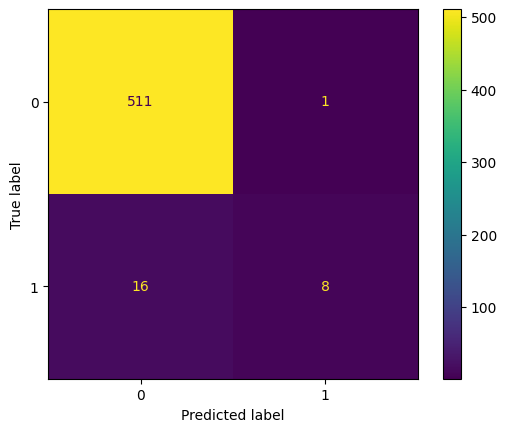

In [53]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()